In [1]:
from connect_four_env.connect_four_env import ConnectFourGymEnv

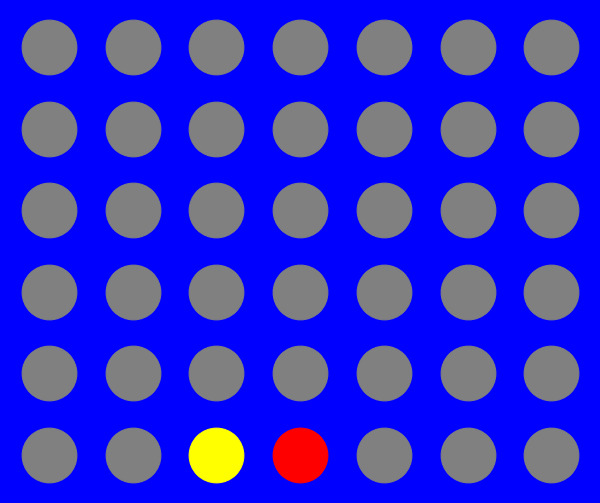

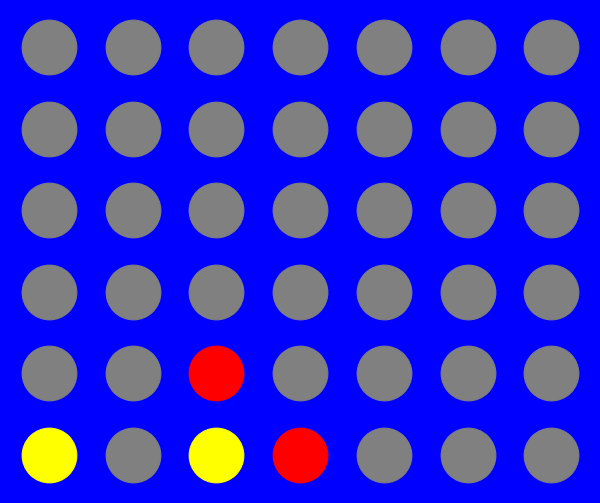

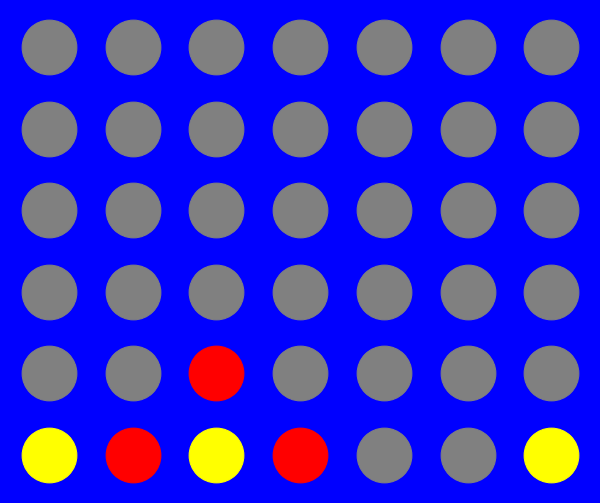

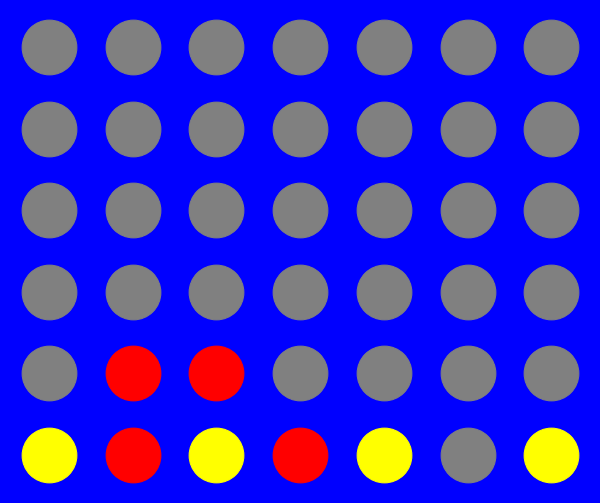

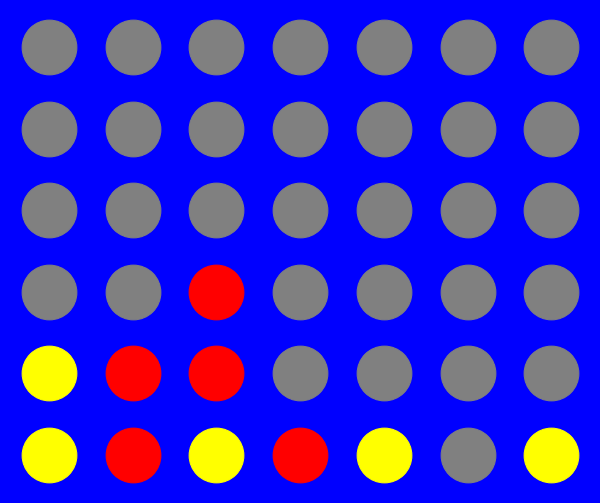

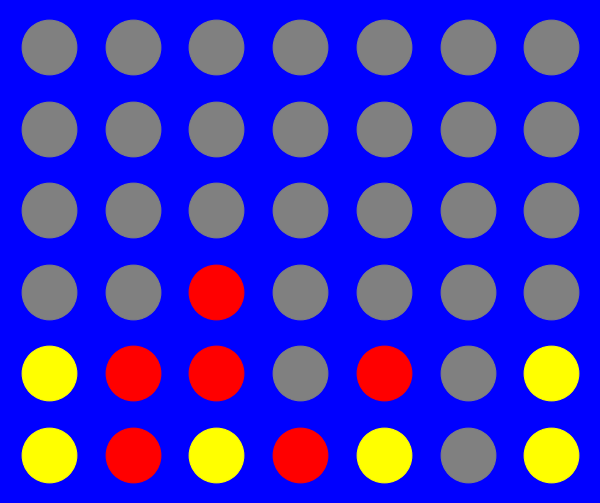

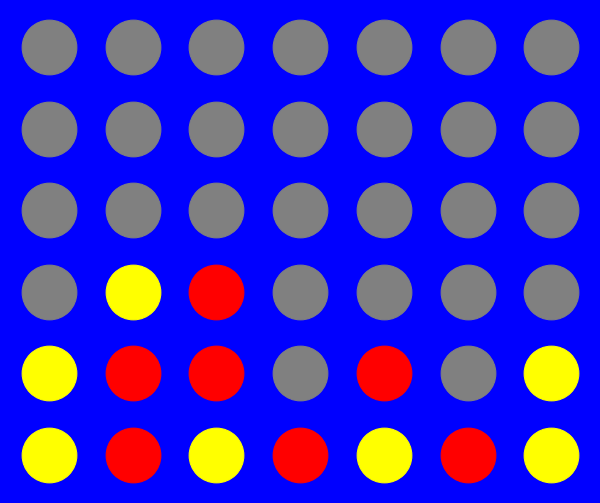

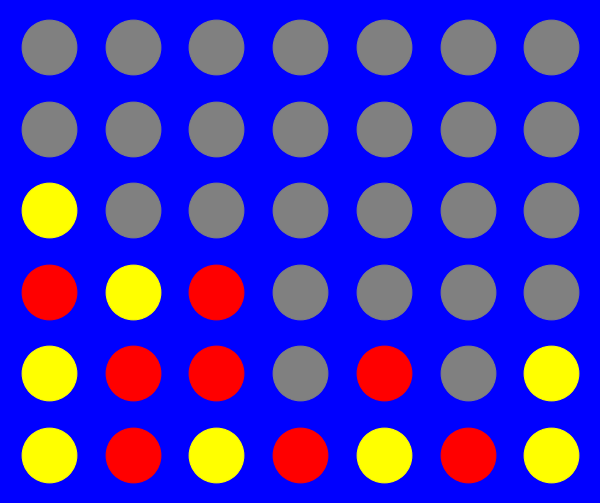

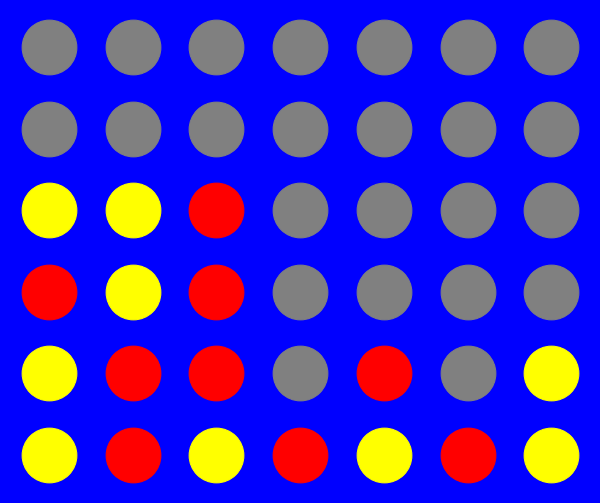

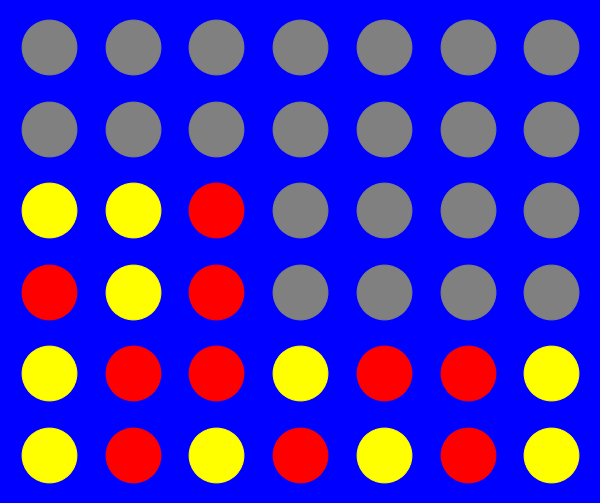

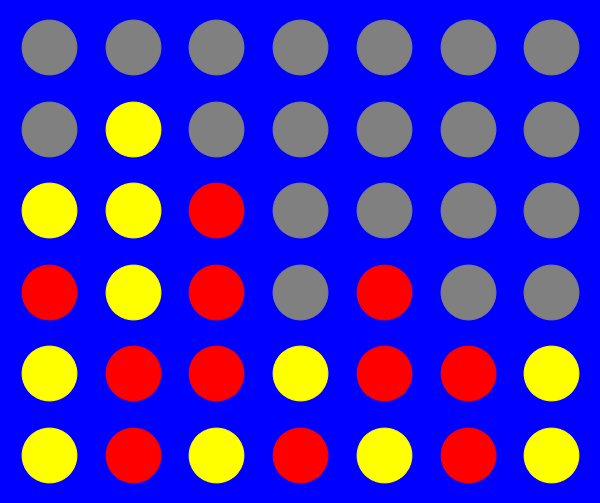

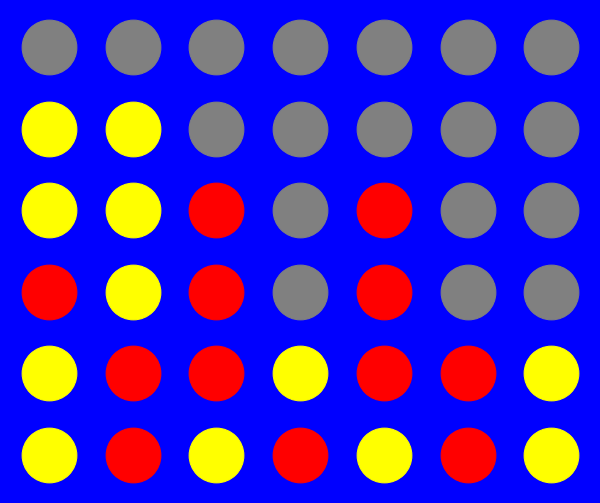

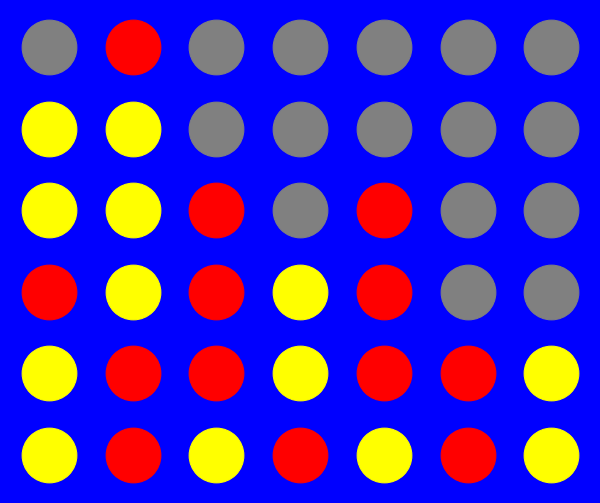

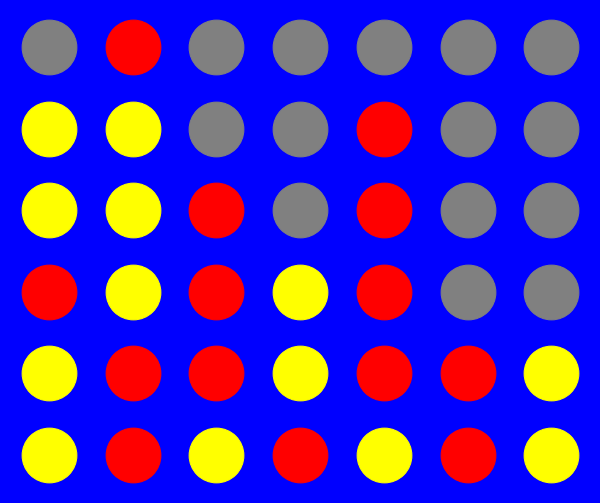

In [7]:
env = ConnectFourGymEnv()

done = False
while not done:
    action = env.action_space.sample()
    valid = False
    while not valid:
        try:
            env._get_fall_row(action[0])
            env._get_fall_row(action[1])
            valid = True
        except:
            action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    env.render()

In [36]:
env.action_space.sample()

array([6, 3])

In [8]:
env._take_action(-1, 2)
env._take_action(1, 2)
env._take_action(-1, 2)
env._take_action(1, 4)
env._take_action(-1, 2)

3

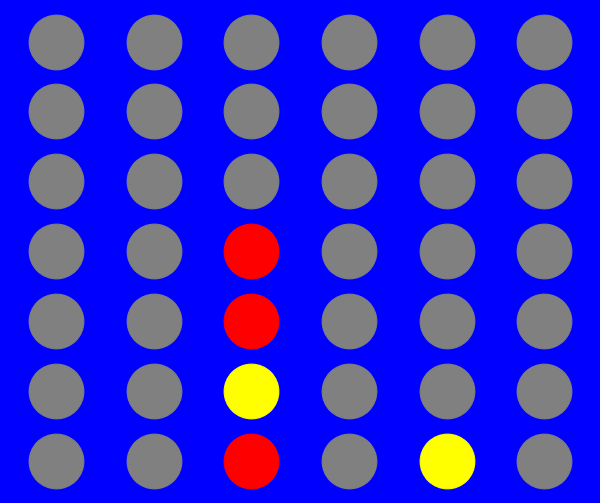

In [9]:
env.render(slot_size=3000)